# EDA and Machine Learning Employee Satisfaction

## Problem

Kinerja dari suatu perusahaan banyak dipengaruhi oleh berbagai macam faktor. Salah satu faktor yang cukup diperhatikan adalah kinerja sumber daya manusianya dimana kinerja sumber daya manusia tersebut juga dipengaruhi oleh rasa puas karyawan terhadap pekerjaannya. Oleh sebab itu, kini masalah kepuasan kerja memang sangat diperhatikan. Hal ini mengingat sumber daya manusia yang menjadi salah satu aset utama perusahaan atau organisasi. Maka, untuk menjaga performa baik suatu perusahaan, diperlukan suatu model untuk mengetahui tingkat kepuasan karyawan terhadap pekerjaannya.

sumber: https://www.finansialku.com/kepuasan-kerja-berpengaruh-terhadap-kinerja/

## Goals

- Menciptakan model yang mampu untuk menilai tingkat kepuasan karyawan
- Memprediksi faktor apa saja yang mempengaruhi tingkat kepuasan karyawan

# Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, log_loss, roc_auc_score, auc, roc_curve

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from xgboost import XGBClassifier

# Getting Basic Understanding Of Data

In [6]:
df= pd.read_csv('/Users/cahyopambudiutomo/Documents/Purwadhika/Python/Modul 3/Ujian Modul 3/Machine-Learning-Exam-master/satisfaction.csv')

In [7]:
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


> Keterangan kolom:
    - emp_id = id karyawan (unique)
    - age = umur karyawan
    - dept = departemen karyawan bekerja
    - location = lokasi kerja karyawan
    - education = pendidikan terakhir karyawan
    - recruitment_type = jalur masuk karyawan ke perusahaan
    - job_level = tingkat pekerjaan karyawan (1 sampai 5, 1 paling rendah)
    - rating = tingkat penilaian karyawan pada periode sebelumnya (1 sampai 5, 1 paling rendah)
    - onsite = pernah tidaknya karyawan pergi ke lokasi kerja
    - awards = jumlah penghargaan yang pernah diperoleh karyawan
    - certifications = apakah karyawan memiliki sertifikasi atau tidak
    - salary = gaji karyawan
    - satisfied = tingkat kepuasan karyawan

### Cek Missing Value

In [8]:
df.isna().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

> Dapat dilihat bahwa tidak terdapat null value pada dataset sehingga tidak diperlukan handling missing value

In [9]:
df.shape

(500, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [11]:
df.describe()

,Unnamed: 0,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,144.481833,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,124.750000,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,249.500000,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,374.250000,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,499.000000,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [12]:
df.describe(include='O').T

,count,unique,top,freq
emp_id,500,499,MKT7287,2
Dept,500,5,Purchasing,109
location,500,2,City,259
education,500,2,PG,254
recruitment_type,500,4,On-Campus,133


> Terlihat bahwa ada hal yang aneh, yaitu terdapat nilai emp_id yang sama ( **MKT7287** ), padahal seharusnya emp_id adalah data yang unique

In [13]:
# Cek emp_id yang nilainya sama

df[df['emp_id'] == 'MKT7287']

# Ternyata walaupun emp_id sama, tetapi memiliki isi data yang berbeda di kolom lainnya

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
188,188,MKT7287,41,Marketing,City,UG,Referral,2,5,0,0,1,29805,1
215,215,MKT7287,50,Marketing,City,PG,Referral,2,2,0,1,0,29805,0


In [14]:
df.dtypes

Unnamed: 0           int64
emp_id              object
age                  int64
Dept                object
location            object
education           object
recruitment_type    object
job_level            int64
rating               int64
onsite               int64
awards               int64
certifications       int64
salary               int64
satisfied            int64
dtype: object

In [15]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [16]:
pd.DataFrame(dfDesc, columns= ['Data Features', 'Data Type', 'Null', 'Null (%)', 'Unique', 'Unique Sample'])

,Data Features,Data Type,Null,Null (%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.0,500,"[178, 219]"
1,emp_id,object,0,0.0,499,"[MKT1262, TECH2045]"
2,age,int64,0,0.0,32,"[24, 32]"
3,Dept,object,0,0.0,5,"[Marketing, Sales]"
4,location,object,0,0.0,2,"[City, Suburb]"
5,education,object,0,0.0,2,"[PG, UG]"
6,recruitment_type,object,0,0.0,4,"[On-Campus, Walk-in]"
7,job_level,int64,0,0.0,5,"[5, 2]"
8,rating,int64,0,0.0,5,"[3, 1]"
9,onsite,int64,0,0.0,2,"[0, 1]"


# Exploratory Data Analysis

## Handling Outliers/ Imbalance Data

In [17]:
df.satisfied.value_counts()

1    263
0    237
Name: satisfied, dtype: int64

In [18]:
(df['satisfied'].value_counts()/len(df)*100).round(2)

1    52.6
0    47.4
Name: satisfied, dtype: float64

In [19]:
(pd.crosstab(index=df['satisfied'], columns='count', normalize=True)*100).round(2)

col_0,count
satisfied,
0,47.4
1,52.6


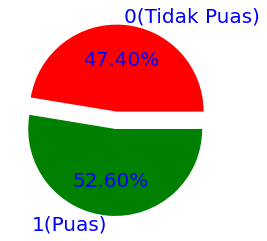

In [20]:
percent= [df[df['satisfied'] == 0]['satisfied'].count(), df[df['satisfied'] == 1]['satisfied'].count()]
label= ['0(Tidak Puas)','1(Puas)']

plt.pie(percent,
       labels= label,
       colors= ['r', 'g'],
       radius= 1,
       textprops={
            'size': 20,
            'color': 'b'
        },
       autopct= '%1.2f%%',
       explode= (.1,.1))
plt.show()

> Berdasarkan pembagian data satisfied, dapat terlihat bahwa data cukup balance

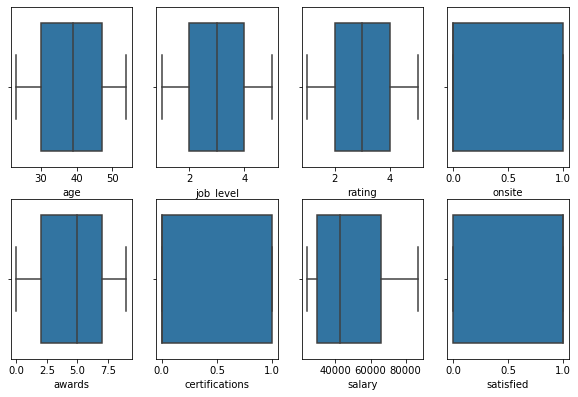

In [21]:
df_describe = df.drop(columns = ['Unnamed: 0','emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

plt.figure(figsize =(10, 10))
x = 1 

for column in df_describe.columns:
    plt.subplot(3,4,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

> Berdasarkan hasil plotting boxplot, dapat terlihat bahwa tidak terdapat outliers sehingga tidak diperlukan handling outliers

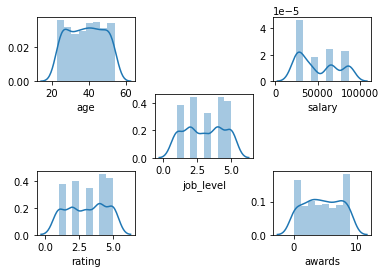

In [22]:
plt.subplot (331)
sns.distplot(df['age'])

plt.subplot(333)
sns.distplot(df['salary'])

plt.subplot(335)
sns.distplot(df['job_level'])

plt.subplot(337)
sns.distplot(df['rating'])

plt.subplot(339)
sns.distplot(df['awards'])

plt.show()

> Dapat terlihat bahwa data terdistribusi normal

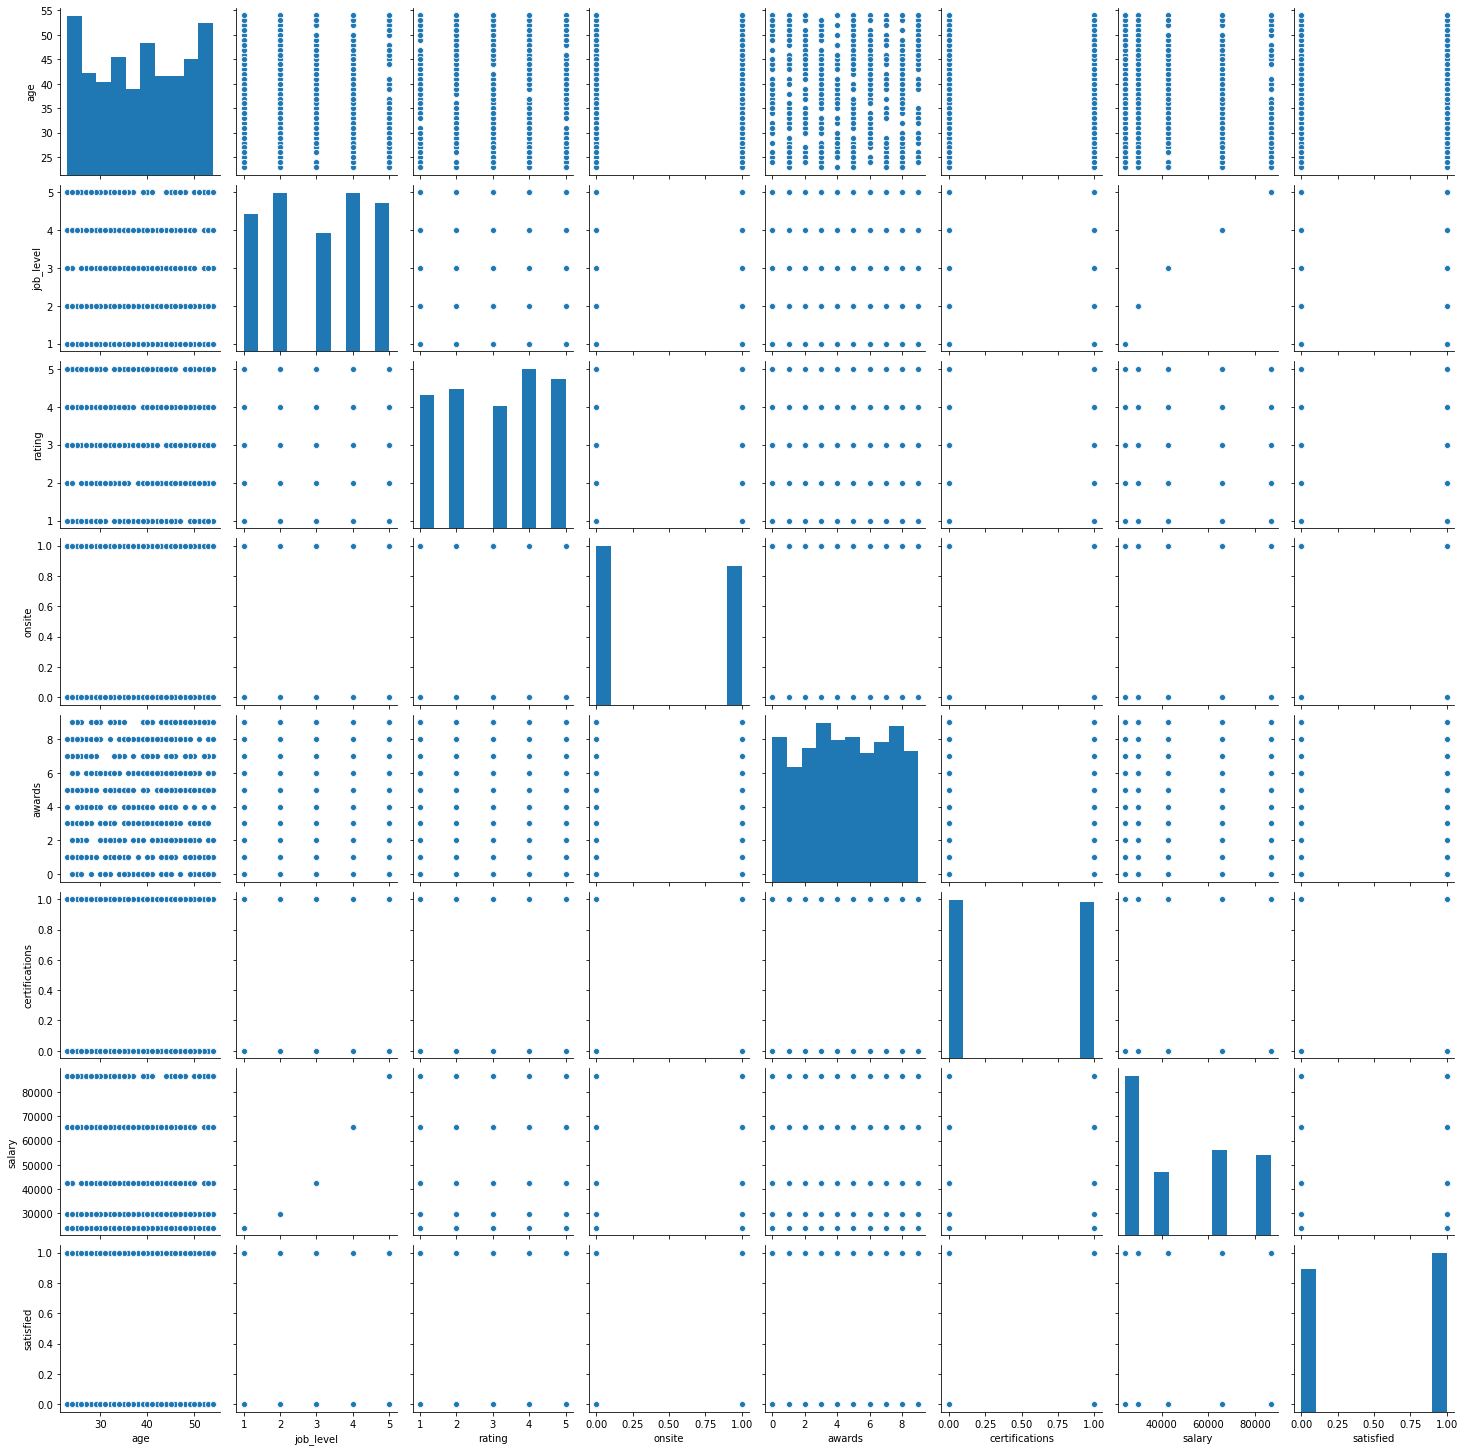

In [23]:
sns.pairplot(df_describe)

# Data Analysis

In [24]:
(pd.crosstab(df['satisfied'], df['recruitment_type'], normalize= 'columns')*100).round(2)

recruitment_type,On-Campus,Recruitment Agency,Referral,Walk-in
satisfied,,,,
0,45.86,45.37,48.09,50.0
1,54.14,54.63,51.91,50.0


In [25]:
rec_sat= df[['recruitment_type', 'satisfied']].groupby(['recruitment_type']).mean()
rec_sat

,satisfied
recruitment_type,
On-Campus,0.541353
Recruitment Agency,0.546296
Referral,0.519084
Walk-in,0.500000


> Berdasarkan hasil crosstab dan groupby antara tingkat kepuasan karyawan dengan jenis perekrutan, dapat terlihat bahwa tidak terdapat kecenderungan dari karyawan yang masuk melalui proses rekrutmen apa yang memiliki tingkat kepuasan tertentu (data terbagi cukup merata, hampir 50:50)

In [26]:
(pd.crosstab(df['satisfied'], df['age'], normalize= 'columns')*100).round(2)

age,23,24,25,26,27,28,29,30,31,32,...,45,46,47,48,49,50,51,52,53,54
satisfied,,,,,,,,,,,,,,,,,,,,,
0,41.67,47.37,68.42,57.89,50.0,46.67,27.27,64.71,46.15,20.0,...,43.75,58.82,70.0,30.77,56.25,57.14,25.0,40.0,40.0,57.89
1,58.33,52.63,31.58,42.11,50.0,53.33,72.73,35.29,53.85,80.0,...,56.25,41.18,30.0,69.23,43.75,42.86,75.0,60.0,60.0,42.11


In [27]:
age_sat= df[['age', 'satisfied']].groupby(['age']).mean()
age_sat

,satisfied
age,
23,0.583333
24,0.526316
25,0.315789
26,0.421053
27,0.500000
28,0.533333
29,0.727273
30,0.352941
31,0.538462


> Berdasarkan hasil crosstab dan groupby antara umur dan tingkat kepuasan, dapat terlihat bahwa tingkat kepuasan tertinggi berada pada usia 32 tahun dan terendah pada usia 43 tahun

In [28]:
(pd.crosstab(df['satisfied'], df['salary'], normalize= 'columns')*100).round(2)

salary,24076,29805,42419,65715,86750
satisfied,,,,,
0,43.16,51.82,50.0,48.18,43.69
1,56.84,48.18,50.0,51.82,56.31


In [29]:
sal_sat= df[['salary', 'satisfied']].groupby(['salary']).mean()
sal_sat

,satisfied
salary,
24076,0.568421
29805,0.481818
42419,0.500000
65715,0.518182
86750,0.563107


> Berdasarkan hasil crosstab dan groupby antara gaji dan tingkat kepuasan, dapat terlihat bahwa tidak terdapat kecenderungan yang besar antara gaji dengan tingkat kepuasan karyawan 

In [30]:
(pd.crosstab(df['satisfied'], df['Dept'], normalize= 'columns')*100).round(2)

Dept,HR,Marketing,Purchasing,Sales,Technology
satisfied,,,,,
0,50.0,53.68,43.12,44.57,45.92
1,50.0,46.32,56.88,55.43,54.08


In [31]:
dep_sat= df[['Dept', 'satisfied']].groupby(['Dept']).mean()
dep_sat

,satisfied
Dept,
HR,0.500000
Marketing,0.463158
Purchasing,0.568807
Sales,0.554348
Technology,0.540816


> Berdasarkan hasil crosstab dan groupby antara departemen dan tingkat kepuasan, terlihat bahwa karyawan di departemen marketing memiliki tingkat kepuasan paling rendah dibanding lainnya

In [32]:
(pd.crosstab(df['satisfied'], df['job_level'], normalize= 'columns')*100).round(2)

job_level,1,2,3,4,5
satisfied,,,,,
0,43.16,51.82,50.0,48.18,43.69
1,56.84,48.18,50.0,51.82,56.31


In [33]:
lev_sat= df[['job_level', 'satisfied']].groupby(['job_level']).mean()
lev_sat

,satisfied
job_level,
1,0.568421
2,0.481818
3,0.500000
4,0.518182
5,0.563107


> Berdasarkan hasil crosstab dan groupby antara job level dan tingkat kepuasan, terlihat bahwa tidak terdapat kecenderungan yang besar antara job level dengan tingkat kepuasan karyawan

In [34]:
(pd.crosstab(df['satisfied'], df['job_level'], normalize= 'columns')*100).round(2)

job_level,1,2,3,4,5
satisfied,,,,,
0,43.16,51.82,50.0,48.18,43.69
1,56.84,48.18,50.0,51.82,56.31


In [35]:
lev_sat= df[['rating', 'satisfied']].groupby(['rating']).mean()
lev_sat

,satisfied
rating,
1,0.463158
2,0.515152
3,0.471264
4,0.557522
5,0.603774


> Berdasarkan hasil crosstab dan groupby antara rating dan tingkat kepuasan, terlihat bahwa karyawan dengan rating tinggi (5) memiliki tingkat kepuasan paling tinggi.

In [36]:
(pd.crosstab(df['satisfied'], df['education'], normalize= 'columns')*100).round(2)

education,PG,UG
satisfied,,
0,46.06,48.78
1,53.94,51.22


In [37]:
edu_sat= df[['education', 'satisfied']].groupby(['education']).mean()
edu_sat

,satisfied
education,
PG,0.539370
UG,0.512195


> Berdasarkan hasil crosstab dan groupby antara education dan tingkat kepuasan, terlihat bahwa tingkat pendidikan PG (Post Graduate) dan UG (Under Graduate) memiliki tingkat kepuasan yang relatif sama

In [38]:
(pd.crosstab(df['satisfied'], df['location'], normalize= 'columns')*100).round(2)

location,City,Suburb
satisfied,,
0,45.95,48.96
1,54.05,51.04


In [39]:
loc_sat= df[['location', 'satisfied']].groupby(['location']).mean()
loc_sat

,satisfied
location,
City,0.540541
Suburb,0.510373


> Berdasarkan hasil crosstab dan groupby antara lokasi dan tingkat kepuasan, terlihat bahwa tidak terdapat perbedaan yang signifikan antara lokasi karyawan dengan tingkat kepuasan

In [40]:
(pd.crosstab(df['satisfied'], df['awards'], normalize= 'columns')*100).round(2)

awards,0,1,2,3,4,5,6,7,8,9
satisfied,,,,,,,,,,
0,38.46,48.78,60.42,56.14,43.14,48.08,41.3,36.0,53.57,46.81
1,61.54,51.22,39.58,43.86,56.86,51.92,58.7,64.0,46.43,53.19


In [41]:
awa_sat= df[['awards', 'satisfied']].groupby(['awards']).mean()
awa_sat

,satisfied
awards,
0,0.615385
1,0.512195
2,0.395833
3,0.438596
4,0.568627
5,0.519231
6,0.586957
7,0.640000
8,0.464286


> Berdasarkan hasil crosstab dan groupby antara awards dan tingkat kepuasan terlihat bahwa tidak terdapat informasi yang jelas-jelas menyatakan bahwa semakin banyak awards yang diperoleh maka tingkat kepuasan semakin tinggi

In [42]:
(pd.crosstab(df['satisfied'], df['onsite'], normalize= 'columns')*100).round(2)

onsite,0,1
satisfied,,
0,48.69,45.92
1,51.31,54.08


In [43]:
ons_sat= df[['onsite', 'satisfied']].groupby(['onsite']).mean()
ons_sat

,satisfied
onsite,
0,0.513109
1,0.540773


> Berdasarkan hasil crosstab dan groupby antara onsite dan tingkat kepuasan terlihat bahwa tidak terdapat kecenderungan yang tinggi mengenai tingkat kepuasan dari karyawan yang pernah ke lokasi kerja maupun tidak

# Data Visualization

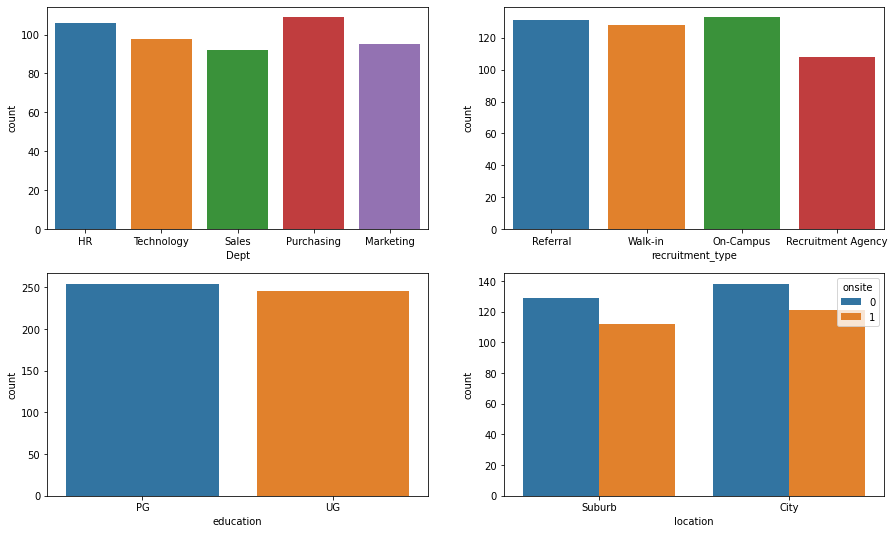

In [44]:
plt.figure(figsize=(15,9))

plt.subplot(221)
sns.countplot(x='Dept', data=df)

plt.subplot(222)
sns.countplot(x='recruitment_type', data=df)

plt.subplot(223)
sns.countplot(x='education', data=df)

plt.subplot(224)
sns.countplot(x='location', data=df, hue= 'onsite')


plt.show()

> Berdasarkan grafik diatas terlihat bahwa jumlah dari dept, recruitment_type, education, dan location cukup berimbang untuk masing-masing data yang berbeda.

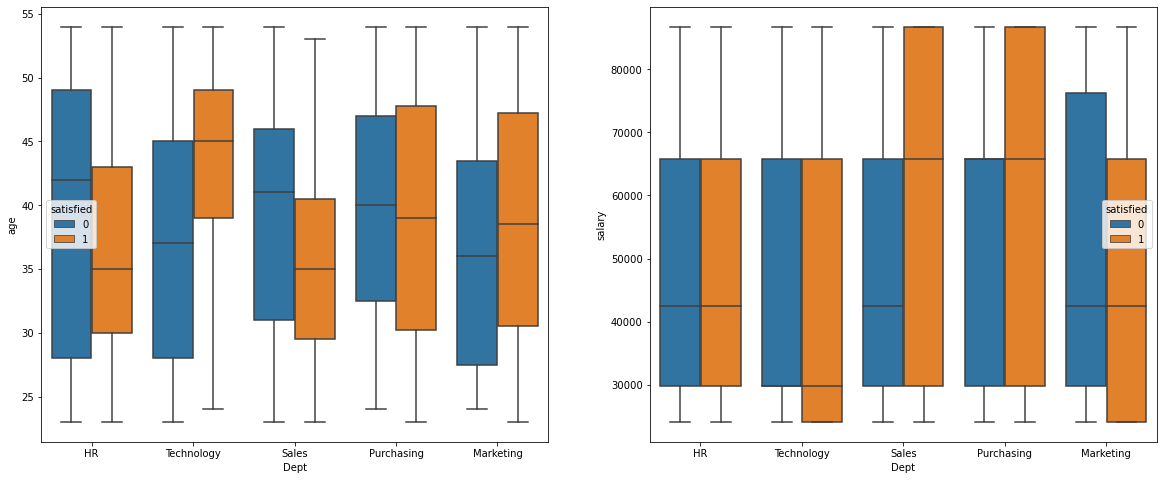

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.boxplot(y= 'age', x= 'Dept', data= df, hue= 'satisfied')

plt.subplot(122)
sns.boxplot(y= 'salary', x= 'Dept', data= df, hue= 'satisfied')

plt.show()

> Berdasar plottingan boxplot diatas, terlihat persebaran antara tingkat kepuasan dari masing-masing departemen berdasar usia dan gaji. Hal yang perlu disorot adalah ternyata terdapat karyawan yang tidak puas walaupun sudah mendapat gaji di atas rata-rata di departemen marketing.

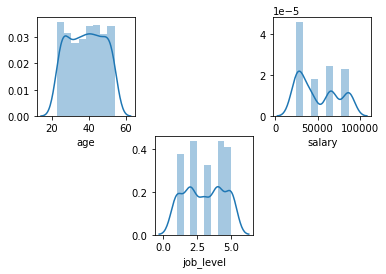

In [46]:
plt.subplot (231)
sns.distplot(df['age'])

plt.subplot(233)
sns.distplot(df['salary'])

plt.subplot(235)
sns.distplot(df['job_level'])

plt.show()

> Terlihat bahwa persebaran untuk gaji, usia, dan job_level di perusahaan ini cukup merata

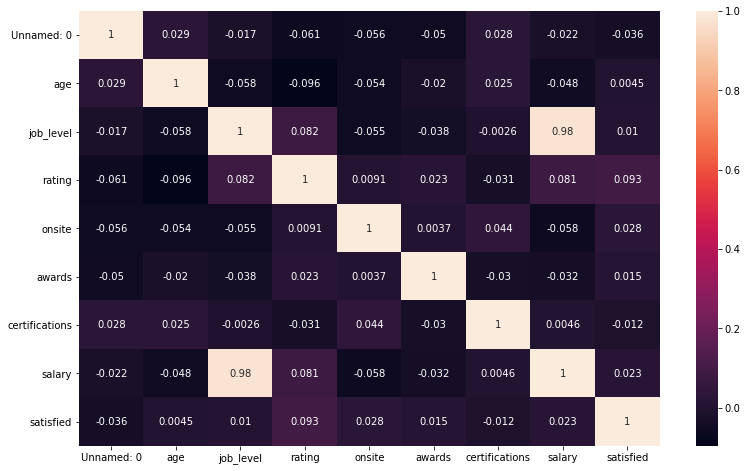

In [47]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

> Terlihat bahwa kolom job_level memiliki korelasi yang sangat tinggi dengan kolom salary

In [48]:
correlation = df.corr()
correlation['satisfied'].sort_values(ascending = False)[1:]

rating            0.093024
onsite            0.027637
salary            0.023168
awards            0.014763
job_level         0.010093
age               0.004490
certifications   -0.011600
Unnamed: 0       -0.036228
Name: satisfied, dtype: float64

> Berdasarkan correlation terhadap satisfied, terlihat tidak ada kolom yang memiliki nilai korelasi yang tinggi

# Data Preprocessing

## Feature Engineering

In [49]:
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


> Berdasarkan data yang ada, maka akan dilakukan pemilihan kolom yang akan digunakan ataupun yang tidak

In [50]:
df.drop(columns=['emp_id'], inplace= True)
df.drop(columns=['recruitment_type'], inplace= True)

# emp_id didrop karena tidak akan berpengaruh pada model
# recruitment_type didrop karena kolom ini tidak memberi pengaruh pada tingkat kepuasan karyawan (berdasar data analisis di atas)

In [51]:
# Mengubah data yang bernilai kategorikal menjadi numerikal (Encoding)

df['location']= df['location'].map({'Suburb': 0, 'City': 1})
df['education']= df['education'].map({'UG': 0, 'PG': 1})
df['Dept']=df['Dept'].map({'HR':0,'Technology':1,'Sales':2,'Purchasing':3,'Marketing':4})

In [52]:
df.head()

,Unnamed: 0,age,Dept,location,education,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,28,0,0,1,5,2,0,1,0,86750,1
1,1,50,1,0,1,3,5,1,2,1,42419,0
2,2,43,1,0,0,4,1,0,2,0,65715,0
3,3,44,2,1,1,2,3,1,0,0,29805,1
4,4,33,0,1,0,2,1,0,5,0,29805,1


In [53]:
df.dtypes

Unnamed: 0        int64
age               int64
Dept              int64
location          int64
education         int64
job_level         int64
rating            int64
onsite            int64
awards            int64
certifications    int64
salary            int64
satisfied         int64
dtype: object

## Data Splitting

In [54]:
X= df.drop(columns=['satisfied'])
y= df.satisfied

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, stratify = y,random_state = 42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(400, 11)
(100, 11)


> Data sudah berhasil displit dengan porsi train 80% dan test 20%

In [57]:
## Scaling

In [58]:
scaler= RobustScaler()

In [59]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [60]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,0.049310,0.6250,0.5,0.0,0.0,0.5,-1.0,1.0,0.4,0.0,0.648733
1,0.191321,0.0625,-0.5,-1.0,0.0,-0.5,-1.0,0.0,0.8,0.0,-0.351267
2,0.566075,-0.2500,0.0,0.0,0.0,1.0,0.0,0.0,0.6,0.0,1.234503
3,-0.558185,-0.6875,0.5,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.234503
4,-0.747535,-0.4375,0.0,-1.0,0.0,0.5,0.5,1.0,-1.0,0.0,0.648733
...,...,...,...,...,...,...,...,...,...,...,...
395,0.140039,0.1250,0.0,-1.0,1.0,-0.5,0.5,0.0,-1.0,1.0,-0.351267
396,-0.128205,0.2500,0.0,0.0,1.0,-1.0,-1.0,0.0,0.8,0.0,-0.510805
397,-0.767258,-1.0000,-1.0,0.0,0.0,-0.5,1.0,0.0,0.6,0.0,-0.351267
398,-0.025641,0.5625,0.5,-1.0,1.0,-0.5,0.5,0.0,0.2,0.0,-0.351267


# Machine Learning

## 1. Logistic Regression

In [61]:
modelLog = LogisticRegression()

In [62]:
modelLog.fit(X_train, y_train)

LogisticRegression()

In [63]:
modelLog.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [64]:
y_pred = modelLog.predict(X_test)

In [65]:
acc_LogReg = accuracy_score(y_test, y_pred)
acc_LogReg

0.53

In [66]:
prec_Log = precision_score(y_test, y_pred)
prec_Log

0.5416666666666666

In [67]:
rec_Log = recall_score(y_test, y_pred, pos_label=1)
rec_Log

0.7358490566037735

In [68]:
f1_Log = f1_score(y_test, y_pred)
f1_Log

0.624

In [69]:
recall_score(y_test, y_pred, pos_label=0)

0.2978723404255319

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37        47
           1       0.54      0.74      0.62        53

    accuracy                           0.53       100
   macro avg       0.52      0.52      0.50       100
weighted avg       0.52      0.53      0.51       100



In [119]:
cm_Log = confusion_matrix(y_test, y_pred, labels=[1, 0])

In [120]:
df_cm_Log = pd.DataFrame(data=cm_Log, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

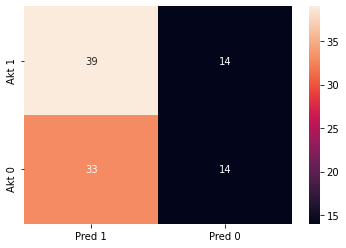

In [121]:
sns.heatmap(df_cm_Log, annot=True)
plt.show()

- Akurasi dan presisi yang diperoleh masih belum baik (belum jauh melebihi 0.5, sehingga ini masih merupakan model yang abu-abu atau istilahnya 'coin toss'), sehingga perlu dilakukan tuning agar mendapat nilai f1-score yang lebih baik lagi karena f1 score adalah indikasi bahwa model memiliki precision dan recall yang baik.
- Confusion matrix masih menunjukkan bahwa model masih banyak melakukan salah prediksi (terlihat di TN, FP, FN, dan TP) sehingga perlu dilakukan tuning.

In [74]:
y_pred= modelLog.predict(X_test)

In [75]:
proba= modelLog.predict_proba(X_test)

In [76]:
log_loss(y_test,proba)

0.6996176896654007

In [77]:
roc_auc_score(y_test, y_pred)

0.5168606985146527

In [78]:
pred= proba[:,1]
fpr, tpr, threshold= roc_curve(y_test,pred)

In [79]:
sc= auc(fpr, tpr)

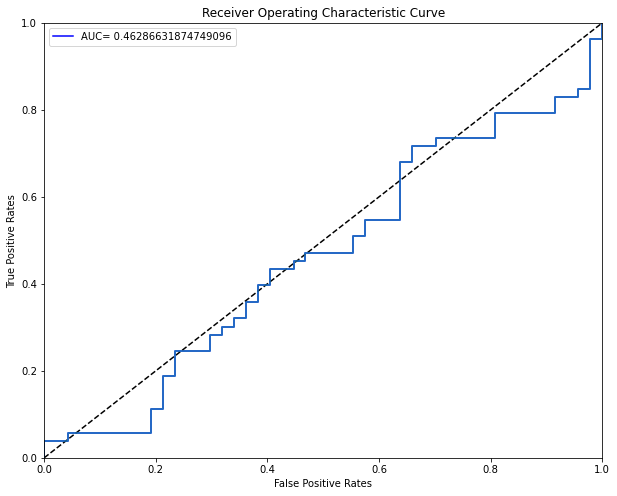

In [80]:
plt.figure(figsize= (10,8))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr,tpr,'b',label=f'AUC= {sc}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rates')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.ylabel('True Positive Rates')
plt.plot(fpr,tpr)

> Terlihat bahwa model masih belum bisa melakukan prediksi dengan baik (masih 50:50 atau 'coin toss')

## 2. KNN

In [81]:
modelKNN = KNeighborsClassifier()

In [82]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
modelKNN.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
y_KNN = modelKNN.predict(X_test)

In [85]:
acc_KNN = accuracy_score(y_test, y_KNN)
acc_KNN

0.6

In [86]:
prec_KNN = precision_score(y_test, y_KNN)
prec_KNN

0.6140350877192983

In [87]:
rec_KNN = recall_score(y_test, y_KNN)
rec_KNN

0.660377358490566

In [88]:
f1_KNN = f1_score(y_test, y_KNN)
f1_KNN

0.6363636363636364

In [89]:
print(classification_report(y_test, y_KNN))

              precision    recall  f1-score   support

           0       0.58      0.53      0.56        47
           1       0.61      0.66      0.64        53

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



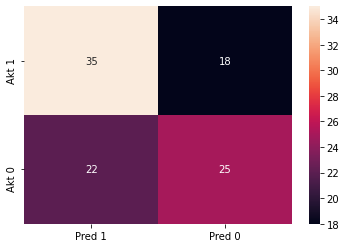

In [90]:
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True)
plt.show()

- Hasil yang diperoleh (prediksi, akurasi, f1 score) lebih baik dari model Logistic Regression 
- Akurasi dan presisi yang diperoleh masih belum baik (belum jauh melebihi 0.5, sehingga ini masih merupakan model yang abu-abu atau istilahnya 'coin toss'), sehingga perlu dilakukan tuning agar mendapat nilai f1-score yang lebih baik lagi karena f1 score adalah indikasi bahwa model memiliki precision dan recall yang baik.
- Confusion matrix masih menunjukkan bahwa model masih banyak melakukan salah prediksi (terlihat di TN, FP, FN, dan TP) sehingga perlu dilakukan tuning.

## 3. Random Forest

In [91]:
model_RF = RandomForestClassifier()

In [92]:
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
model_RF.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [94]:
y_RF = model_RF.predict(X_test)

In [95]:
acc_RF = accuracy_score(y_test, y_RF)
acc_RF

0.49

In [96]:
prec_RF = precision_score(y_test, y_RF)
prec_RF

0.5192307692307693

In [97]:
rec_RF = recall_score(y_test, y_RF)
rec_RF

0.5094339622641509

In [98]:
f1_RF = f1_score(y_test, y_RF)
f1_RF

0.5142857142857143

In [99]:
print(classification_report(y_test, y_RF))

              precision    recall  f1-score   support

           0       0.46      0.47      0.46        47
           1       0.52      0.51      0.51        53

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



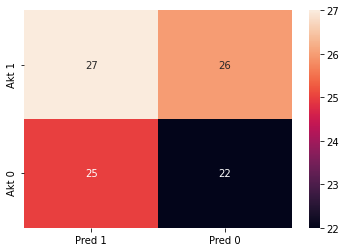

In [100]:
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True)
plt.show()

- Akurasi dan presisi yang diperoleh masih belum baik (belum jauh melebihi 0.5, sehingga ini masih merupakan model yang abu-abu atau istilahnya 'coin toss'), sehingga perlu dilakukan tuning agar mendapat nilai f1-score yang lebih baik lagi karena f1 score adalah indikasi bahwa model memiliki precision dan recall yang baik.
- Confusion matrix masih menunjukkan bahwa model masih banyak melakukan salah prediksi (terlihat di TN, FP, FN, dan TP) sehingga perlu dilakukan tuning.

## 4. XGBoost

In [101]:
XGB_base = XGBClassifier()
XGB_base.fit(X_train, y_train)
y_XGB_base = XGB_base.predict(X_test)

In [102]:
XGB_base_train = XGB_base.score(X_train, y_train)

print('train accuracy XGB base: ', XGB_base.score(X_train, y_train))
print('test accuracy XGB base: ', XGB_base.score(X_test, y_test))

train accuracy XGB base:  1.0
test accuracy XGB base:  0.44


In [103]:
acc_XGB = accuracy_score(y_test, y_XGB_base)
rec_XGB = recall_score(y_test, y_XGB_base)
prec_XGB = precision_score(y_test, y_XGB_base)
f1_XGB = f1_score(y_test, y_XGB_base)

print(classification_report(y_test, y_XGB_base))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        47
           1       0.47      0.43      0.45        53

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.44      0.44      0.44       100



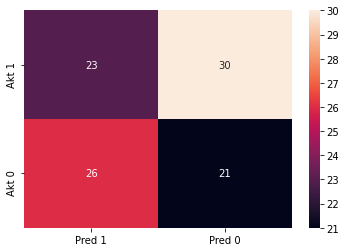

In [176]:
cm_XGB = confusion_matrix(y_test, y_XGB_base, labels=[1, 0])
df_XGB = pd.DataFrame(data=cm_XGB, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_XGB, annot=True)
plt.show()

- Akurasi dan presisi yang diperoleh masih belum baik (belum jauh melebihi 0.5, sehingga ini masih merupakan model yang abu-abu atau istilahnya 'coin toss'), sehingga perlu dilakukan tuning agar mendapat nilai f1-score yang lebih baik lagi karena f1 score adalah indikasi bahwa model memiliki precision dan recall yang baik.
- Confusion matrix masih menunjukkan bahwa model masih banyak melakukan salah prediksi (terlihat di TN, FP, FN, dan TP) sehingga perlu dilakukan tuning.

## Comparing Model

In [105]:
data = {
    "LogReg" : [acc_LogReg, prec_Log, rec_Log, f1_Log],
    "KNN" : [acc_KNN, prec_KNN, rec_KNN, f1_KNN],
    "RF"  : [acc_RF, prec_RF, rec_RF, f1_RF],
    "XGB"  : [acc_XGB, prec_XGB, rec_XGB, f1_XGB]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg,KNN,RF,XGB
Accuracy,0.530000,0.600000,0.490000,0.440000
Precision,0.541667,0.614035,0.519231,0.469388
Recall,0.735849,0.660377,0.509434,0.433962
F1 Score,0.624000,0.636364,0.514286,0.450980


# Hyper Parameter Tuning

## 1. Logistic Regression + Tuning

In [106]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [107]:
logreg_tuned = model_logreg_tuned.best_estimator_
y_tuned_logreg = logreg_tuned.predict(X_test_scaled)

In [108]:
logreg_tuned_train = logreg_tuned.score(X_train_scaled, y_train)
print('train accuracy logreg tuned Scaled: ', logreg_tuned.score(X_train_scaled, y_train))
print('test accuracy logreg tuned Scaled: ', logreg_tuned.score(X_test_scaled, y_test))

train accuracy logreg tuned Scaled:  0.59
test accuracy logreg tuned Scaled:  0.55


In [109]:
## Classification Report LogReg setelah di tuning
acc_tuned_logreg = accuracy_score(y_test, y_tuned_logreg)

print(classification_report(y_test, y_tuned_logreg))

              precision    recall  f1-score   support

           0       0.52      0.72      0.60        47
           1       0.62      0.40      0.48        53

    accuracy                           0.55       100
   macro avg       0.57      0.56      0.54       100
weighted avg       0.57      0.55      0.54       100



In [117]:
## Classification Report LogReg sebelum di tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37        47
           1       0.54      0.74      0.62        53

    accuracy                           0.53       100
   macro avg       0.52      0.52      0.50       100
weighted avg       0.52      0.53      0.51       100



> Terdapat kenaikan nilai f1 score pada model LogReg yang sudah di tuning (before: 0.53, after: 0.55)

In [110]:
cm_logreg_tuned = confusion_matrix(y_test, y_tuned_logreg, labels=[1, 0])

In [122]:
df_cm_logreg_tuned = pd.DataFrame(data=cm_logreg_tuned, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

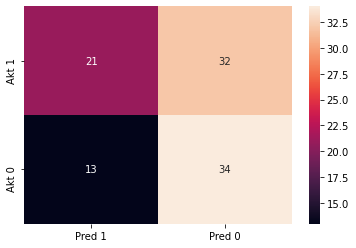

In [123]:
## Confusion Matrix setelah tuning
sns.heatmap(df_cm_logreg_tuned, annot=True)
plt.show()

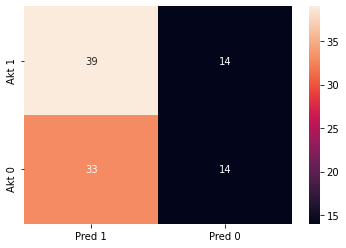

In [124]:
## Confusion Matrix sebelum tuning
sns.heatmap(df_cm_Log, annot=True)
plt.show()

> Confusion Matrix juga mengalami perubahan, hal ini memungkinkan karena terjadinya trade off antara recall dan precision sehingga berpengaruh ke nilai TN, FN, TP, dan FP

## 2. KNN + Tuning

In [134]:
model1 = KNeighborsClassifier(weights='uniform')
model1.fit(X_train_scaled,y_train)
y_predKNN_tuned = model1.predict(X_test_scaled)

In [135]:
## Classification Report KNN setelah di tuning
print(classification_report(y_test,y_predKNN_tuned))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        47
           1       0.63      0.58      0.61        53

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



In [136]:
## Classification Report KNN sebelum di tuning
print(classification_report(y_test, y_KNN))

              precision    recall  f1-score   support

           0       0.58      0.53      0.56        47
           1       0.61      0.66      0.64        53

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



> Terdapat nilai F1 score yang sama setelah dan sebelum di tuning.

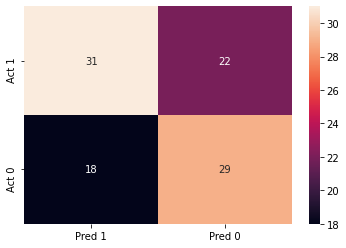

In [148]:
## Confusion Matrix setelah tuning
cm=confusion_matrix(y_test,y_predKNN_tuned,labels=[1,0])
df_knn_tuned = pd.DataFrame(cm, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df_knn_tuned,annot=True)

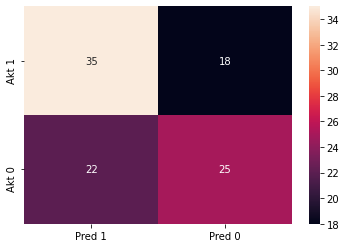

In [131]:
## Confusion Matrix sebelum tuning
sns.heatmap(df_KNN, annot=True)
plt.show()

> Confusion Matrix mengalami perubahan di pred 1 dan pred 0 yang menjadi lebih baik dalam menebak

## 3. Random Forest + Tuning

In [144]:
model_RF= RandomForestClassifier()

In [145]:
param = {
'max_depth': [10, 50, 100, None],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [100, 1000, 1500, 2000]
}

In [147]:
model_rf_hp = GridSearchCV(model_RF, param, cv = 5, n_jobs=-1, verbose=1)
model_rf_hp.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 19.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 1000, 1500, 2000]},
             verbose=1)

In [149]:
model_rf_hp.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [151]:
y_pred_rf_hp = model_rf_hp.predict(X_test_scaled)

In [152]:
## Classification Report RF setelah di tuning
print(classification_report(y_test, y_pred_rf_hp))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53        47
           1       0.57      0.53      0.55        53

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



In [153]:
## ## Classification Report RF sebelum di tuning
print(classification_report(y_test, y_RF))

              precision    recall  f1-score   support

           0       0.46      0.47      0.46        47
           1       0.52      0.51      0.51        53

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



>Terdapat kenaikan nilai f1 score pada model RF yang sudah di tuning (before: 0.49, after: 0.54)

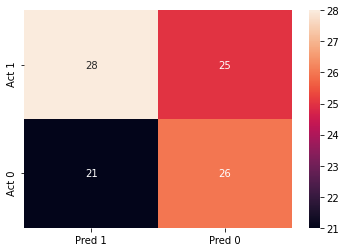

In [154]:
## Confusion Matrix sesudah tuning
cm=confusion_matrix(y_test,y_pred_rf_hp,labels=[1,0])
df_rf_tuned = pd.DataFrame(cm, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df_rf_tuned,annot=True)

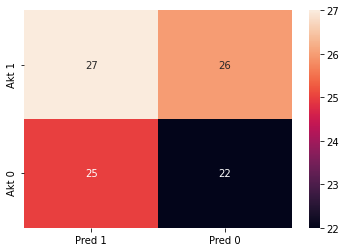

In [155]:
## Confusion Matrix sebelum tuning
sns.heatmap(df_RF, annot=True)
plt.show()

> Melalui confusion matrix kita dapat melihat bahwa model bisa menebak lebih baik dari sebelum di tuning

# 4. XGBoost + Tuning

In [168]:
XGB_tuned =XGBClassifier()
param_XGB_tuned = {'max_depth': [3, 2, 4, 1],
                 'learning_rate': [0.1, 0.3],
                 'n_estimator': [100],
                 'gamma': [0, 0.3, 0.5],
                 'colsample_bytree': [1, 1.4, 0.5],
                 'subsample':[1],
                 'reg_alpha':[0, 0.5, 1.0],
                 'reg_lambda':[1, 1.5, 2.1]}

model_XGB_tuned = GridSearchCV(XGB_tuned, param_XGB_tuned, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
model_XGB_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:   49.5s


[15:46:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   54.7s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [169]:
XGB_tuned = model_XGB_tuned.best_estimator_
y_XGB_tuned = XGB_tuned.predict(X_test)

In [170]:
XGB_tuned_train = XGB_tuned.score(X_train,y_train)

print('Training Score for XGB tuned model: ', XGB_tuned.score(X_train,y_train))
print('Testing Score for XGB tuned model: ', XGB_tuned.score(X_test, y_test))

Training Score for XGB tuned model:  0.825
Testing Score for XGB tuned model:  0.49


In [172]:
## Classification Report XGBoost setelah di tuning
acc_tuned_XGB = accuracy_score(y_test, y_XGB_tuned)

print(classification_report(y_test, y_XGB_tuned))

              precision    recall  f1-score   support

           0       0.46      0.49      0.47        47
           1       0.52      0.49      0.50        53

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



In [173]:
## Classification Report XGBoost sebelum di tuning
print(classification_report(y_test, y_XGB_base))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        47
           1       0.47      0.43      0.45        53

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.44      0.44      0.44       100



> Terdapat kenaikan nilai f1 score pada model XGB yang sudah di tuning (before: 0.44, after: 0.49)

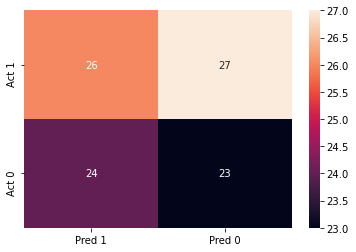

In [175]:
## Confusion Matrix sesudah tuning
cm_XGB=confusion_matrix(y_test,y_XGB_tuned,labels=[1,0])
df_XGB_tuned = pd.DataFrame(cm_XGB, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df_XGB_tuned,annot=True)

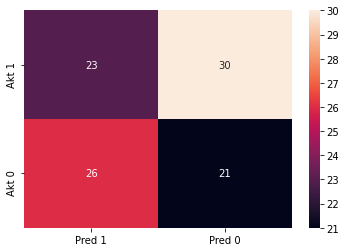

In [177]:
sns.heatmap(df_XGB, annot=True)
plt.show()

> Confusion Matrix mengalami perubahan di pred 1 dan pred 0 yang menjadi lebih baik dalam menebak

# Kesimpulan

- Berdasarkan nilai dari Classification Report dan Confusion Matrix yang ada, dapat dilihat bahwa model belum bisa menebak dengan baik, sehingga diperlukan tuning lebih lanjut atau penambahan data untuk meningkatkan kualitas model.
- Berdasarkan data analisis, terlihat bahwa terdapat karyawan yang belum puas terutama di karyawan yang berumur tua dan di beberapa departemen yang ada. Baiknya, perusahaan melakukan evaluasi dan berdialog dengan karyawan agar karyawan menjadi puas dalam bekerja.
- Model terbaik yang diperoleh untuk dataset satisfaction saat ini adalah model berbasis KNN yang telah di tuning.

# Saran

- Model yang sudah ada ini baiknya disempurnakan lagi dengan cara sesuai saran yang ada di kesimpulan.
- Baiknya perusahaan melakukan mediasi kepada karyawan yang tidak puas dan melakukan evaluasi pada sistem kerja yang sudah ada karena masih banyak (hampir setengah total karyawan) terdapat karyawan yang tidak puas pada kinerjanya. Hal ini harus segera dilakukan karena dikhawatirkan akan menular pada karyawan lain yang sudah puas.
- Perlakuan lebih harus diberikan pada karyawan yang ada di departemen marketing karena terdapat anomali dimana ada karyawan dengan gaji di atas rata-rata tetapi tidak puas.

In [156]:
import joblib

In [180]:
joblib.dump(model1, 'model_satisfaction')

['model_satisfaction']